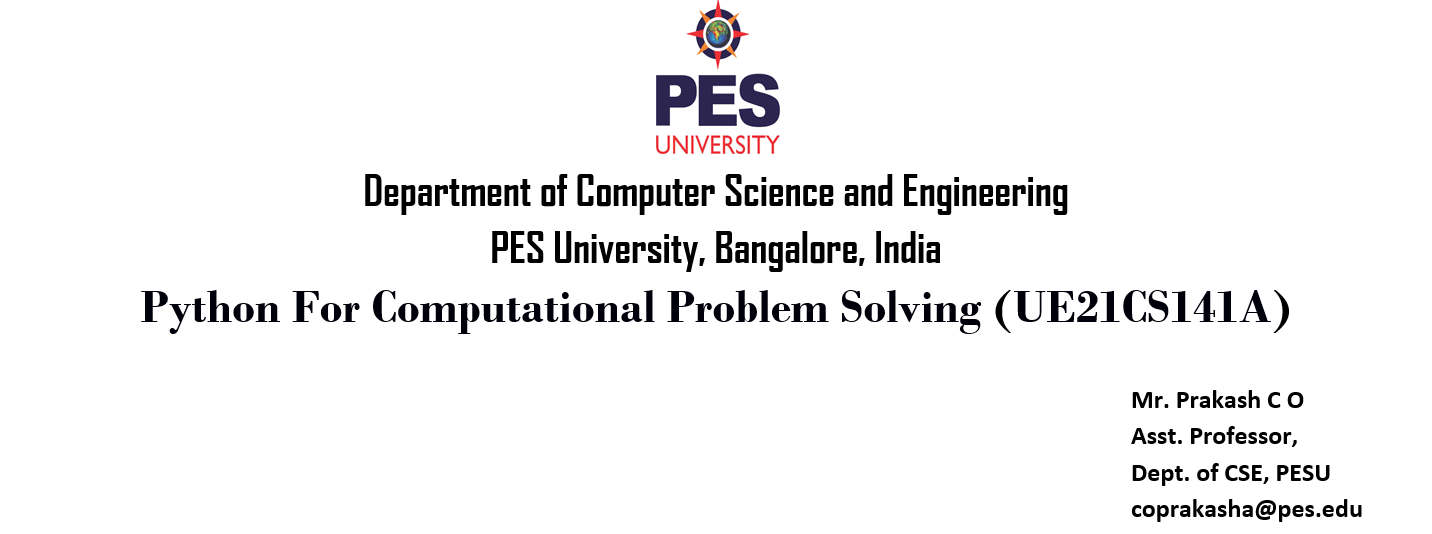

### Iterators in Python

###### What are Iterables?

“Iterables are objects that are capable of returning their members one at a time”. Objects like lists, tuples, sets, dictionaries, strings, etc. are called iterables. In short, anything you can loop over is an iterable.

Python iterables implement a special method called __iter__(). 
The __iter__() method returns an iterator object.

Let’s use a Python built-in function dir() to find out all the associated attributes of the iterable.

In [18]:
lst = ['hi','hello','how r you?','how do you do?']
print(dir(lst))

['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


###### What are Iterators?

An Iterator is an object representing a stream of data that can be iterated upon. 

An Iterator allows programmers to access or traverse through all its elements without any deeper understanding of its structure.

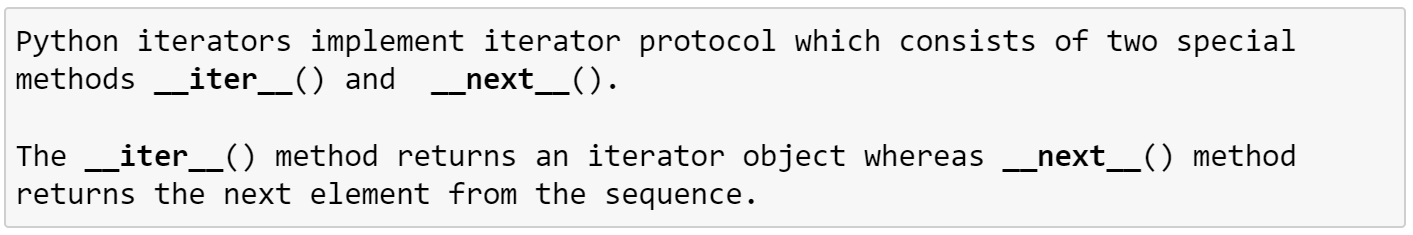

Let’s use a Python built-in function dir() to find out all the associated attributes of the iterators.

In [20]:
lst = ['hi','hello','how r you?','how do you do?']
iterobj=lst.__iter__()
print(dir(iterobj))
print(type(iterobj))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__length_hint__', '__lt__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__']
<class 'list_iterator'>


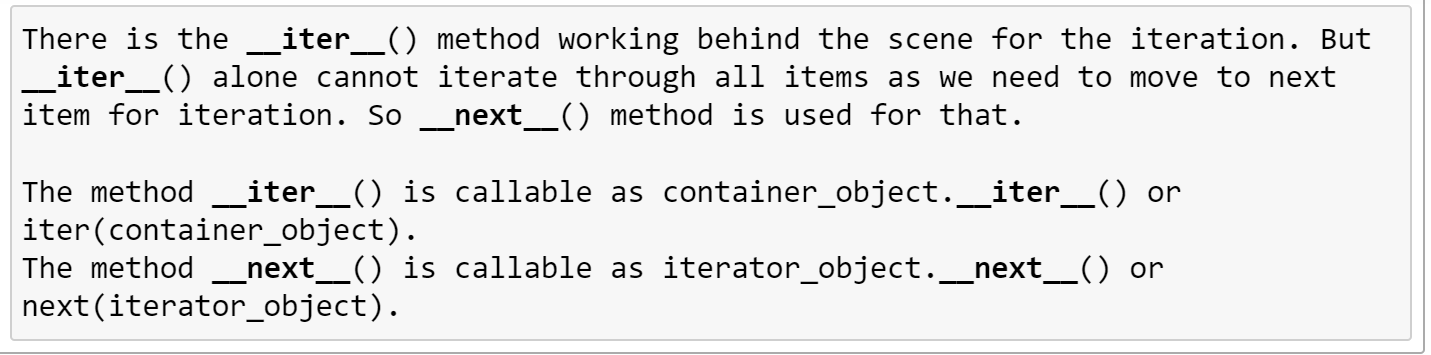

In [25]:
lst = ['hi','hello','how r you?','how do you do?']
iterobj=lst.__iter__()       # or iterobj=iter(lst)
#print(iterobj.__iter__())
print(iterobj.__next__())    # or print(next(iterobj))

hi


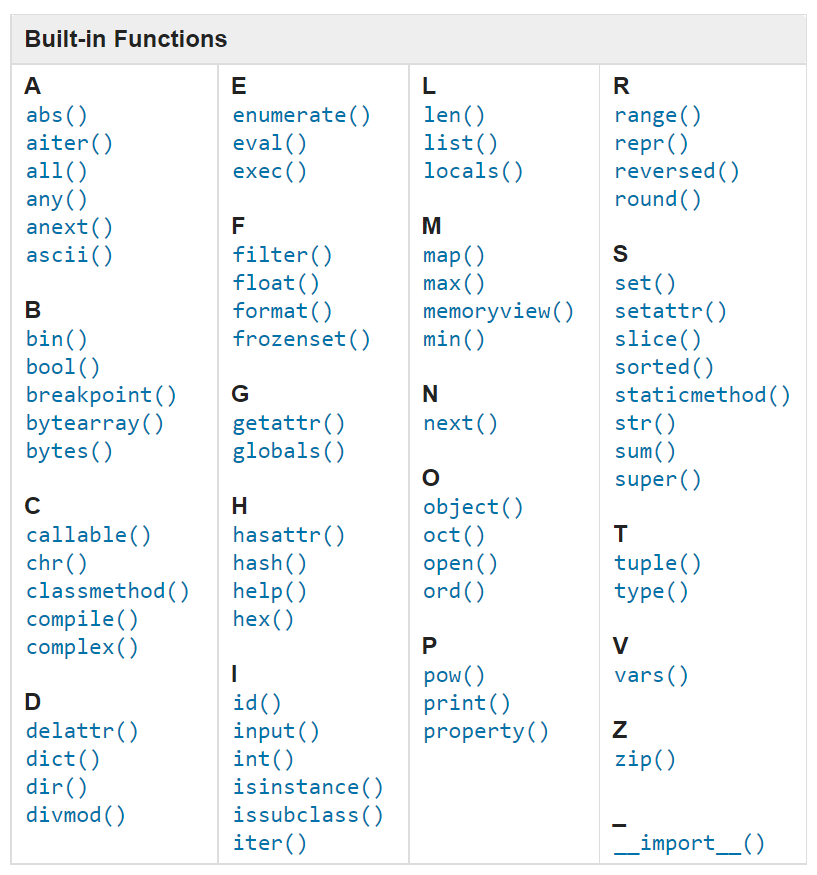

##### How for loops actually work?

Let’s take a list(iterator/iterable) and iterate through it.

In [2]:
sample = ['data science', 'social network analytics', 'machine learning']
for i in sample:
    print(i)

data science
social network analytics
machine learning


###### So basically, the process of the for loop going through each element is called iteration and the object sample through which the for loop is iterating is called iterable.

What actually is happening here?

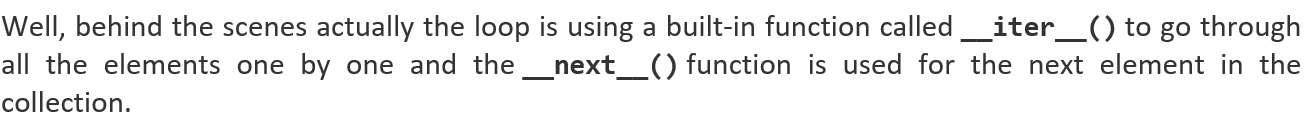

In [11]:
obj = lst.__iter__()  #using iter function for container object lst
print(obj.__next__()) #Iteration-1 using next function on iterator object gives ist element
print(obj.__next__()) #Iteration-2 gives 2nd element
print(obj.__next__()) #Iteration-3 gives 3rd element
print(obj.__next__()) #Iteration-4 gives 4th element

hi
hello
how r you?
how do you do?


###### So, here is how things actually work behind the iteration in for loop or any iterable in Python.

In [4]:
lst = ['hi','hello','how r you?','how do you do?']
obj = iter(lst) #using iter function for container object lst
print(next(obj)) #Iteration 1 using next function on iterator object gives ist element

hi


An iterator is essentially a value producer that yields successive values from its associated iterable object. The built-in function next() is used to obtain the next value from in iterator.

In [5]:
print(next(obj)) #Iteration 2

hello


Notice how an iterator retains its state internally. It knows which values have been obtained already, so when you call next(), it knows what value to return next.

In [6]:
print(next(obj)) #Iteration 3

how r you?


In [7]:
print(next(obj)) #Iteration 4

how do you do?


What happens when the iterator runs out of values?

If all the values from an iterator have been returned already, a subsequent next() call raises a StopIteration exception. Any further attempts to obtain values from the iterator will fail.

In [12]:
print(next(obj)) #Iteration 5

StopIteration: 

You can only obtain values from an iterator in one direction. You can’t go backward. There is no prev() function. But you can define two independent iterators on the same iterable object:

In [27]:
lst = ['hi','hello','how r you?','how do you do?']
obj1 = iter(lst) 
obj2 = iter(lst) 
print(next(obj1))
print(next(obj2))
print(next(obj1))
print(next(obj2))

hi
hi
hello
hello


In [17]:
print(dir(obj1))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__length_hint__', '__lt__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__']


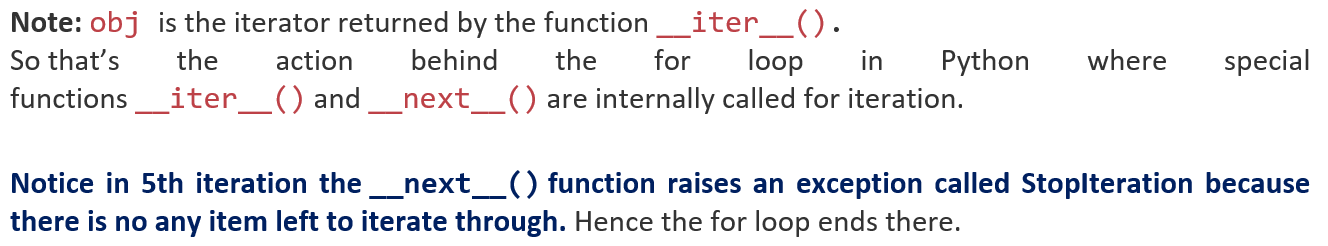

##### We can summarize above process in following points.

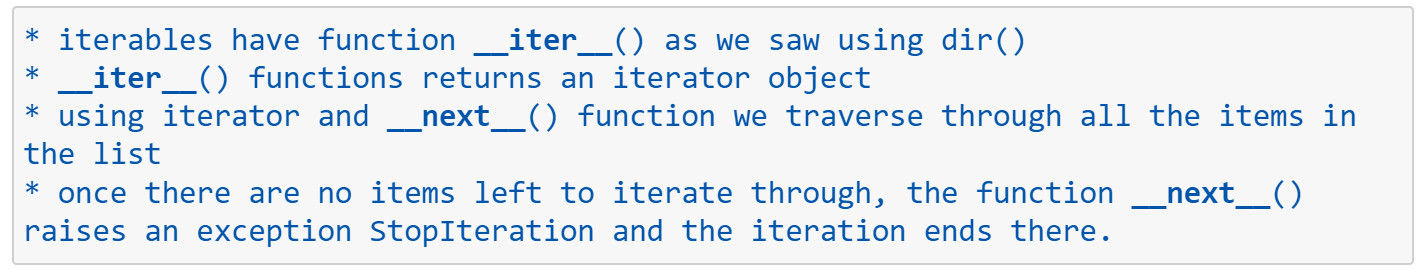

#### The Guts of the Python for Loop
You now have been introduced to all the concepts you need to fully understand how Python’s for loop works. Before proceeding, let’s review the relevant terms:
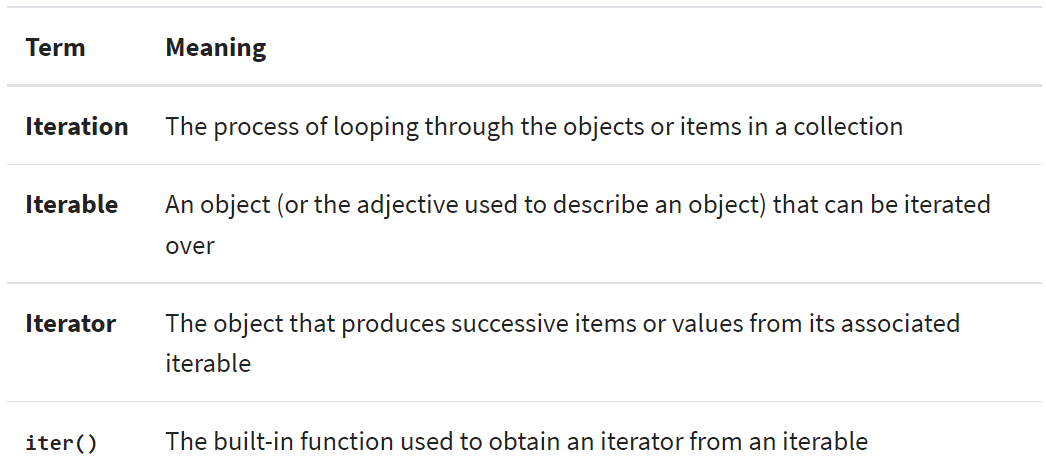

Now, consider again the simple for loop presented at the start of this tutorial:


In [7]:
a = ['foo', 'bar', 'baz']
for i in a:
    print(i)

foo
bar
baz


This loop can be described entirely in terms of the concepts you have just learned about. To carry out the iteration this for loop describes, Python does the following:

* Calls iter() to obtain an iterator for a given iterable
* Calls next() repeatedly to obtain each item from the iterator in turn
* Terminates the loop when next() raises the StopIteration exception

The loop body is executed once for each item next() returns, with loop variable i set to the given item for each iteration.

This sequence of events is summarized in the following diagram:
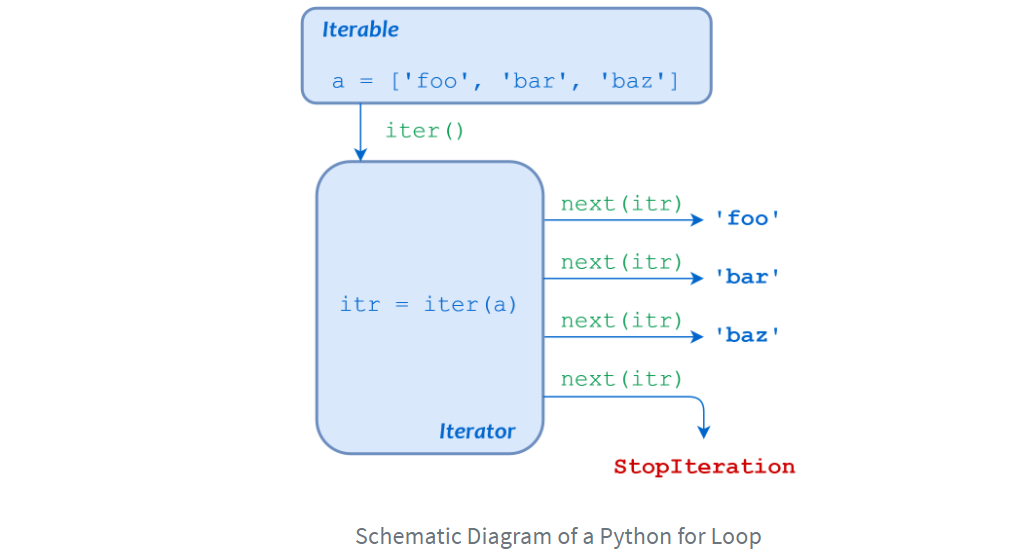

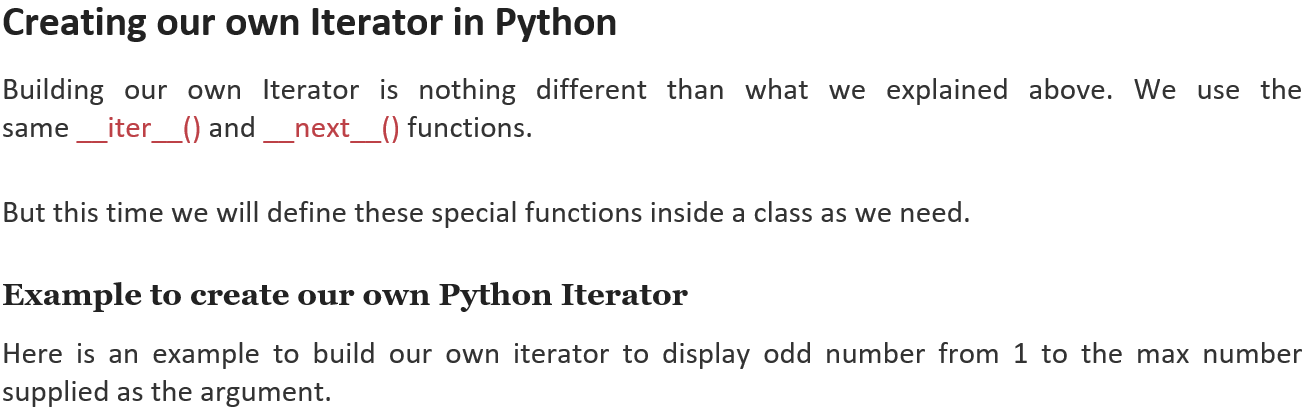

In [16]:
class OddNum:
    """Class to implement iterator protocol"""
    
    def __init__(self, num = 0):
        self.num = num

    def __iter__(self):
        self.x = 1
        return self

    def __next__(self):
        if self.x <= self.num:
            odd_num = self.x
            self.x += 2
            return odd_num
        else:
            raise StopIteration

Now we can use directly for loop or use __iter__() and __next__().

Using for loop

In [10]:
obj = OddNum(10)
for num in obj:
    print(num)

1
3
5
7
9


The for statement will call iter(obj). This call is changed to OddNum.__iter__(obj).

Using __iter__() and __next__()

In [12]:
obj = OddNum(10)
i = iter(obj)   # i = OddNum.__iter__(obj)
print(next(i))        # OddNum.__next__(i)

1


In [17]:
print(next(i)) 

3


In [18]:
print(next(i)) 

5


In [19]:
print(next(i)) 

7


In [20]:
print(next(i)) 

9


In [21]:
print(next(i)) 

StopIteration: 

References:
1.	19_gen_iterator.pdf – Prof. N S Kumar, Dept. of CSE, PES University.
2.	https://www.w3schools.com/python/
3.	https://docs.python.org/
4.	https://www.geeksforgeeks.org/ generators-in-python/
5.	http://www.trytoprogram.com/python-programming/python-iterators/
6.	http://www.trytoprogram.com/python-programming/python-generators
